#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
movies = pd.read_csv("E:\Kaggle Datasets\Movies Data/movies.csv")

C:\Users\paddy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
pd.set_option("display.max_columns",24)

### WEIGHTED MEAN FORMULA

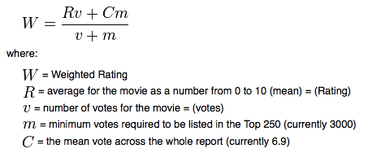

#### CLEANING THE DATA

In [133]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


* HERE SOME MOVIES ARE RELEASED AND SOME ARE NOT RELEASED SO,LETS REMOVE THE RECORDS OF NON REALEASED MOVIES
<BR>
* ALSO REMOVING UNWANTED COLUMNS

In [134]:
movies.shape

(45466, 24)

In [135]:
# removing columns
movies.drop(columns=["homepage","imdb_id","belongs_to_collection","overview","poster_path","production_countries",'spoken_languages',"tagline","video"],axis=1,inplace=True)

In [136]:
# REMOVING UNRELEASED MOVIES
index = movies[movies['status']!="Released"].index
movies.drop(index,axis=0,inplace=True)

In [137]:
movies.shape

(45014, 15)

In [138]:
movies.head()

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,status,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


In [139]:
# NOW LETS SET UP THE VARIABLES REQUIRED ACC TO THE FORMULA

In [140]:
R = movies['vote_average']
v = movies['vote_count']
m = movies['vote_count'].quantile(0.7)
C = movies['vote_average'].mean()

In [141]:
weighted_avg = ((R*v)+(C*m))/(v+m)

In [142]:
movies['weighted_avg'] = weighted_avg

In [143]:
movies.sort_values(by="weighted_avg",ascending=False,inplace=True)

In [144]:
movies.reset_index(inplace=True)

In [145]:
movies_new = movies[["title","popularity","vote_average","vote_count","weighted_avg"]]

#### LETS GIVE PRIORITY TO POPULARITY TOO BY MAKING SOME CHABFE IN THE WEIGHTED AVERAGE FEATURE

* 30% PRIORITY FOR POPULARITY

* 70% PRIORITY FOR WEIGHTED AVERAGE

##### LETS SCALE DOWN THE FEATURES FIRST

In [146]:
from sklearn.preprocessing import MinMaxScaler # as it scales features fron range -01

In [147]:
transformer = MinMaxScaler()
scaled_features = transformer.fit_transform(movies[["weighted_avg","popularity"]])
movies_normalized = pd.DataFrame(scaled_features,columns=["weighted_avg","popularity"])

In [148]:
movies_normalized.head(10)

,weighted_avg,popularity
0,1.000000,0.062937
1,0.918835,0.094332
2,0.918277,0.075087
3,0.908799,0.062944
4,0.904267,0.008221
5,0.885676,0.224968
6,0.885432,0.116659
7,0.885297,0.257449
8,0.884067,0.076212
9,0.884032,0.117445


###### LETS SET OUR FORMULA

In [149]:
score = 0.7*(movies_normalized["weighted_avg"]) + 0.3*(movies_normalized['popularity'])

In [150]:
movies_new.head()

,title,popularity,vote_average,vote_count,weighted_avg
0,Dilwale Dulhania Le Jayenge,34.457,9.1,661.0,8.973312
1,The Shawshank Redemption,51.6454,8.5,8358.0,8.491422
2,The Godfather,41.1093,8.5,6024.0,8.488112
3,Your Name.,34.461252,8.5,1030.0,8.431841
4,Planet Earth,4.501137,8.8,176.0,8.404936


In [151]:
movies_new['score'] = score

C:\Users\paddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
movies_new.sort_values(by='score',ascending=False,inplace=True)
movies_new.reset_index(inplace=True)

C:\Users\paddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
del movies_new['index']

In [154]:
movies_new

,title,popularity,vote_average,vote_count,weighted_avg,score
0,Dilwale Dulhania Le Jayenge,34.457,9.1,661.0,8.973312,0.718881
1,Pulp Fiction,140.95,8.3,8670.0,8.292305,0.696942
2,Minions,547.488,6.4,4729.0,6.395918,0.696120
3,The Dark Knight,123.167,8.3,12269.0,8.294558,0.687464
4,Big Hero 6,213.85,7.8,6289.0,7.791383,0.677829
5,The Shawshank Redemption,51.6454,8.5,8358.0,8.491422,0.671484
6,The Godfather,41.1093,8.5,6024.0,8.488112,0.665320
7,Gone Girl,154.801,7.9,6023.0,7.890591,0.657169
8,Your Name.,34.461252,8.5,1030.0,8.431841,0.655043
9,Fight Club,63.8696,8.3,9678.0,8.293104,0.654800
